In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import the dataset, engineer the target variable

In [323]:
df = pd.read_csv('C:/Users/Lauren/Documents/ORIE4741/4741project/var_num.csv')

In [324]:
df.dtypes

CASEID          float64
AGE1979         float64
SAMPLE_SEX      float64
SAMPLE_RACE     float64
AFQT-3          float64
ASVAB-8         float64
HIGHESTGRADE    float64
HEALTHLIMIT     float64
INCOME          float64
INDUSTRY        float64
NUMJOBS         float64
URBAN-RURAL     float64
REGION          float64
MARSTAT-COL     float64
YR ENT LF       float64
YR EMP          float64
YR UNEMP        float64
YR OUT          float64
dtype: object

In [325]:
#create a boolean column to see if they have ever experienced unemployment
def exper_tf(row):
    if row['YR UNEMP']>0.0:
        return 1
    else:
        return 0

In [326]:
df['UNEMP_TF'] = df.apply(exper_tf, axis = 1)

In [369]:
df['SAMPLE_RACE'].value_counts()

3.0    5866
2.0    2375
1.0    1665
0.0       1
Name: SAMPLE_RACE, dtype: int64

### Create Plots to help Describe the Data

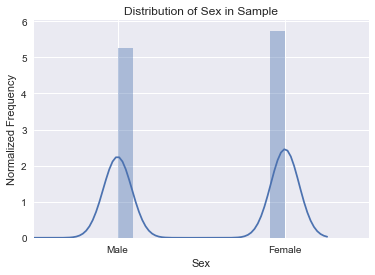

In [328]:
sns.distplot(df['SAMPLE_SEX']);
plt.xlim([0.5,2.5]);
plt.xticks(np.arange(1,3), ('Male', 'Female'));
plt.title('Distribution of Sex in Sample');
plt.xlabel('Sex');
plt.ylabel('Normalized Frequency');

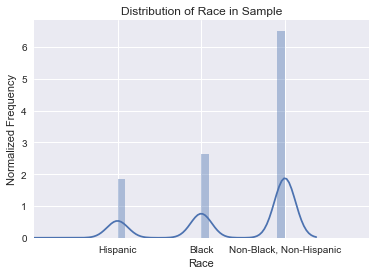

In [329]:
sns.distplot(df['SAMPLE_RACE']);
plt.xlim([0,4]);
plt.xticks(np.arange(1,4), ('Hispanic', 'Black', 'Non-Black, Non-Hispanic'));
plt.title('Distribution of Race in Sample');
plt.xlabel('Race');
plt.ylabel('Normalized Frequency');

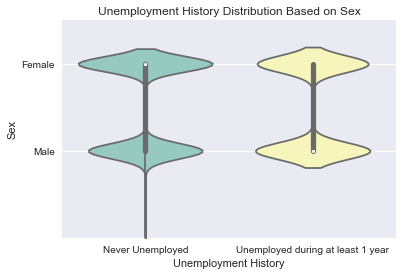

In [330]:
sns.violinplot(df['UNEMP_TF'], df['SAMPLE_SEX'], palette='Set3');
plt.xticks(np.arange(0,2), ('Never Unemployed', 'Unemployed during at least 1 year'));
plt.title('Unemployment History Distribution Based on Sex');
plt.xlabel('Unemployment History');
plt.ylabel('Sex');
plt.ylim([0,2.5]);
plt.yticks(np.arange(1,3), ('Male', 'Female'));

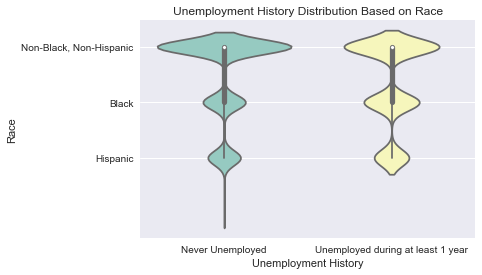

In [331]:
sns.violinplot(df['UNEMP_TF'], df['SAMPLE_RACE'], palette='Set3');
plt.xticks(np.arange(0,2), ('Never Unemployed', 'Unemployed during at least 1 year'));
plt.title('Unemployment History Distribution Based on Race');
plt.xlabel('Unemployment History');
plt.ylabel('Race');
plt.yticks(np.arange(1,4), ('Hispanic', 'Black', 'Non-Black, Non-Hispanic'));

In [332]:
df_score = df[df['AFQT-3']>=0.0]

In [333]:
print(df_score.shape[0])

9457


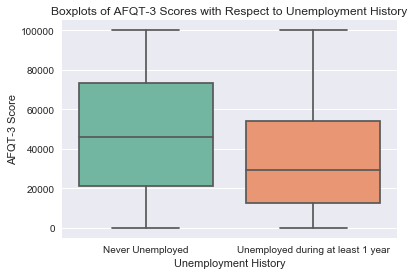

In [334]:
#do charts based on the score
sns.boxplot(x='UNEMP_TF', y = 'AFQT-3', data=df_score, palette='Set2');
plt.xlabel('Unemployment History');
plt.xticks(np.arange(0,2), ('Never Unemployed', 'Unemployed during at least 1 year'));
plt.ylabel('AFQT-3 Score');
plt.title('Boxplots of AFQT-3 Scores with Respect to Unemployment History');

In [335]:
df_score1 = df[df['ASVAB-8']>=0.0]

In [336]:
print(df_score1.shape[0])

9457


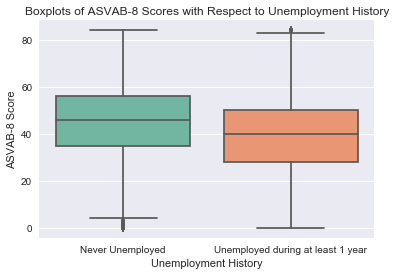

In [337]:
sns.boxplot(x='UNEMP_TF', y = 'ASVAB-8', data=df_score1, palette='Set2');
plt.xlabel('Unemployment History');
plt.xticks(np.arange(0,2), ('Never Unemployed', 'Unemployed during at least 1 year'));
plt.ylabel('ASVAB-8 Score');
plt.title('Boxplots of ASVAB-8 Scores with Respect to Unemployment History');

In [338]:
#income
income = df[df['INCOME']>=0]

In [339]:
print(income.shape[0])

8184


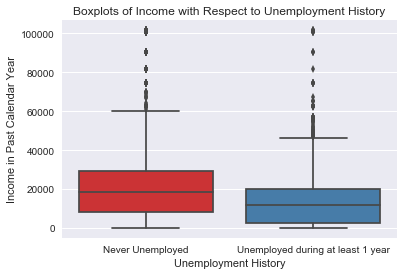

In [340]:
sns.boxplot(x='UNEMP_TF', y = 'INCOME', data=income, palette='Set1');
plt.xlabel('Unemployment History');
plt.xticks(np.arange(0,2), ('Never Unemployed', 'Unemployed during at least 1 year'));
plt.ylabel('Income in Past Calendar Year');
plt.title('Boxplots of Income with Respect to Unemployment History');

### Clean the Data

In [341]:
clean_data = df[(df['AFQT-3']>=0) & (df['ASVAB-8']>=0) &(df['INCOME']>=0) 
                & (df['URBAN-RURAL']>=0) & (df['REGION']>=0) & (df['HEALTHLIMIT']>=0)
               & (df['MARSTAT-COL']>=0)]

In [342]:
clean_data.shape[0]

7625

In [343]:
clean_data = clean_data.drop('INDUSTRY', 1)
clean_data = clean_data.drop('HIGHESTGRADE', 1)
clean_data = clean_data.drop('YR UNEMP', 1)

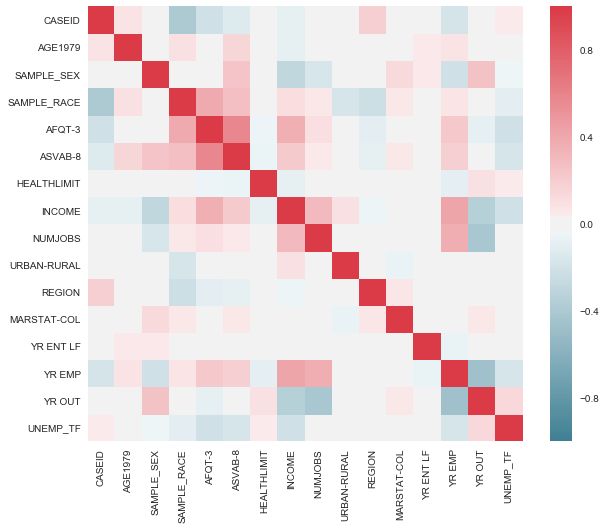

In [344]:
f, ax = plt.subplots(figsize=(10, 8))
corr = clean_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [345]:
clean_data.head()

,CASEID,AGE1979,SAMPLE_SEX,SAMPLE_RACE,AFQT-3,ASVAB-8,HEALTHLIMIT,INCOME,NUMJOBS,URBAN-RURAL,REGION,MARSTAT-COL,YR ENT LF,YR EMP,YR OUT,UNEMP_TF
0,2.0,20.0,2.0,3.0,6841.0,52.0,0.0,19000.0,2.0,1.0,1.0,1.0,1979.0,15.0,4.0,0
1,3.0,17.0,2.0,3.0,49444.0,72.0,1.0,4000.0,2.0,1.0,4.0,2.0,1979.0,8.0,10.0,0
2,4.0,16.0,2.0,3.0,55761.0,62.0,1.0,33000.0,2.0,1.0,1.0,3.0,1986.0,7.0,2.0,0
4,6.0,18.0,1.0,3.0,99393.0,68.0,0.0,25000.0,2.0,1.0,4.0,2.0,1982.0,15.0,0.0,0
5,8.0,20.0,2.0,3.0,44022.0,48.0,0.0,15500.0,3.0,1.0,1.0,3.0,1981.0,16.0,1.0,0


### Encode the Categorical Variables as necessary

In [346]:
clean_data_dumb = pd.get_dummies(clean_data, prefix='Sex', columns=['SAMPLE_SEX'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Sex_1.0':'Male'})
clean_data_dumb = clean_data_dumb.drop('Sex_2.0', 1)

In [347]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Race', columns=['SAMPLE_RACE'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_3.0':'NBNH'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_2.0':'Black'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Race_1.0':'Hispanic'})

In [348]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Region', columns=['REGION'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_4.0':'West'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_3.0':'South'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_2.0':'North_Central'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Region_1.0':'Northeast'})

In [350]:
clean_data_dumb = pd.get_dummies(clean_data_dumb, prefix='Mar', columns=['MARSTAT-COL'], drop_first=True)
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_3.0':'Other'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_2.0':'Married'})
clean_data_dumb=clean_data_dumb.rename(columns = {'Mar_1.0':'Never_Mar'})

In [353]:
clean_data_dumb.head()

,CASEID,AGE1979,AFQT-3,ASVAB-8,HEALTHLIMIT,INCOME,NUMJOBS,URBAN-RURAL,YR ENT LF,YR EMP,...,Hispanic,Black,NBNH,Northeast,North_Central,South,West,Never_Mar,Married,Other
0,2.0,20.0,6841.0,52.0,0.0,19000.0,2.0,1.0,1979.0,15.0,...,0,0,1,1,0,0,0,1,0,0
1,3.0,17.0,49444.0,72.0,1.0,4000.0,2.0,1.0,1979.0,8.0,...,0,0,1,0,0,0,1,0,1,0
2,4.0,16.0,55761.0,62.0,1.0,33000.0,2.0,1.0,1986.0,7.0,...,0,0,1,1,0,0,0,0,0,1
4,6.0,18.0,99393.0,68.0,0.0,25000.0,2.0,1.0,1982.0,15.0,...,0,0,1,0,0,0,1,0,1,0
5,8.0,20.0,44022.0,48.0,0.0,15500.0,3.0,1.0,1981.0,16.0,...,0,0,1,1,0,0,0,0,0,1


### First pass- Logistic Regression

In [354]:
#make a chart, then do logistic regression
import sklearn
from sklearn.linear_model import LogisticRegression

In [370]:
X = clean_data_dumb.loc[:, clean_data_dumb.columns != 'UNEMP_TF']
target = clean_data_dumb['UNEMP_TF']

In [371]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, target, test_size=0.2)

In [372]:
model = LogisticRegression(penalty='l1')

In [373]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [374]:
expected = y_train
predicted = model.predict(X_train)

In [375]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.67      0.83      0.74      3668
          1       0.60      0.39      0.47      2432

avg / total       0.64      0.65      0.63      6100



In [376]:
print(metrics.confusion_matrix(expected, predicted))

[[3042  626]
 [1489  943]]


In [377]:
predicted1 = model.predict(X_test)

In [378]:
print(metrics.classification_report(y_test, predicted1))

             precision    recall  f1-score   support

          0       0.69      0.85      0.76       935
          1       0.63      0.41      0.49       590

avg / total       0.67      0.68      0.66      1525



In [379]:
print(metrics.confusion_matrix(y_test, predicted1))

[[795 140]
 [351 239]]


In [380]:
print(model.score(X_train, y_train))

0.653278688525


In [381]:
print(model.score(X_test, y_test))

0.678032786885


In [367]:
print(model.coef_)

[[ -4.98948506e-06  -3.93232190e-03  -7.52829867e-06  -2.81539289e-03
    3.87463707e-03  -2.38605497e-05   2.33956120e-01  -3.81727144e-03
    1.28038343e-04  -4.32101808e-02   9.28586291e-02   4.79931183e-01
    1.43660572e-01   1.65586498e-01  -2.46803948e-02   0.00000000e+00
    5.43548865e-02  -1.65263687e-01   3.49108866e-02   1.65637806e-01
   -1.54262330e-01   1.48772386e-01]]
